# CIFAR-10 Neural Network

This notebook contains code for training a neural network on the CIFAR-10 dataset using Python and TensorFlow/Keras. It follows a similar structure to the MNIST neural network notebook but is adapted for the CIFAR-10 dataset, which consists of 32x32 color (32x32x3) images in 10 classes. These classes are various animals and vehicles.

First, we will load the necessary libraries.

In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

Then we can load the CIFAR-10 dataset and split it into training, validation, and test sets.

The data is split into the following sets:
- Training set: 4,000 images
- Validation set: 1,000 images
- Test set: 1,000 images

In [31]:
# Load and unpack CIFAR-10 dataset
cifar = tf.keras.datasets.cifar10
(X_full, y_full), (X_test_full, y_test_full) = cifar.load_data()

# Use only first 5,000 instances for training/validation split
X_small = X_full[:5000]
y_small = y_full[:5000]

# Split into 4,000 train and 1,000 validation
X_train, X_valid = X_small[:4000], X_small[4000:]
y_train, y_valid = y_small[:4000], y_small[4000:]

# Use only first 1,000 test samples
X_test = X_test_full[:1000]
y_test = y_test_full[:1000]

To get an idea of how the data looks, we can display the first image in the training set along with its label.

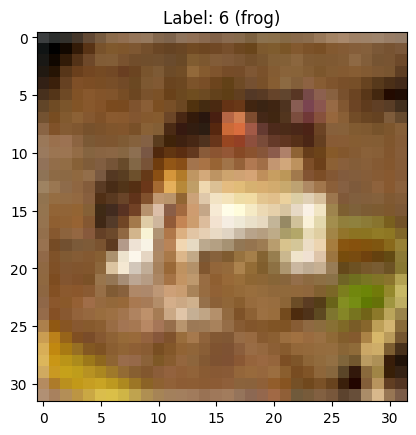

In [32]:
# Display the first image in the training set
plt.imshow(X_train[0])
plt.title(f"Label: {y_train[0][0]} (frog)")
plt.show()

As the gradient descent optimization algorithm works better with normalized data, we will preprocess the data by reshaping the images into vectors and normalizing the pixel values to the range [0, 1]. Additonally, since the images are 32x32 pixels with 3 color channels (RGB), we will reshape them into vectors of size $32 \times 32 \times 3 = 3072$.

In [33]:
# Preprocess the data: reshape and normalize pixel values to [0, 1]
X_train = X_train.reshape(-1, 32*32*3).astype('float32') / 255.0
X_valid = X_valid.reshape(-1, 32*32*3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32*32*3).astype('float32') / 255.0

Now we can define the neural network model. The architecture consists of an input layer, four hidden layers with 256 neurons each with ELU activation functions and He initialization, and an output layer with softmax activation for multi-class classification.

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(32*32*3,)),
    tf.keras.layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])

We now define the nadam optimizer with a learning rate of 0.001, compile the model with sparse categorical cross-entropy loss (suitable for integer labels), and accuracy as the evaluation metric.

In [35]:
nadam_optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

model.compile(
    optimizer=nadam_optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Before we start training, we will set up an early stopping callback to prevent overfitting, overheating of my PC, and to save the best model during training.

In [36]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

Now, we can train the model using the training data, validating on the validation set, and applying the early stopping callback. We alsos set the number of epochs to 50 and the batch size to 128.

In [37]:
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb]
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.1478 - loss: 3.6088 - val_accuracy: 0.1910 - val_loss: 2.1799
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2677 - loss: 1.9997 - val_accuracy: 0.2410 - val_loss: 2.0692
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3173 - loss: 1.8819 - val_accuracy: 0.2600 - val_loss: 2.0757
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.3492 - loss: 1.8101 - val_accuracy: 0.2940 - val_loss: 1.9817
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3668 - loss: 1.7481 - val_accuracy: 0.3070 - val_loss: 1.9670
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3930 - loss: 1.6965 - val_accuracy: 0.3280 - val_loss: 1.9163
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4108 - loss: 1.6382 - val_accuracy: 0.3320 - val_loss: 1.8981
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4310 - loss: 1.5884 - val_accuracy: 0.3520 - v

Below, we plot the history object to visualize the training and validation accuracy and loss over epochs. This helps us understand how well the model is learning and if it is overfitting.

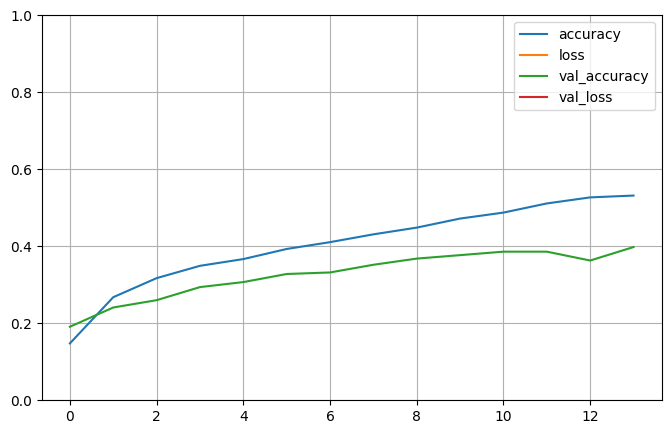

In [38]:
history = model.history.history

pd.DataFrame(history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Finally, we evaluate the trained model on the test set to see how well it generalizes to unseen data. We print out the test accuracy to assess the model's performance.

In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3740 - loss: 1.7548
Test accuracy: 0.3740


We here observe a depressing 37.4 percent accuracy on the test set. This is likely due to the simple architecture of the neural network and the limited amount of training data used. More advanced architectures, such as convolutional neural networks (CNNs), and larger datasets typically yield better performance on image classification tasks like CIFAR-10.

In [40]:
model.save('../models/cifar10_nn_model.keras')